In [64]:
# Librerias para manipulacion de datos
import numpy as np
import pandas as pd

# Librerias para visualizaciones de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para hacer el escalamiento de los datos
from sklearn.preprocessing import MinMaxScaler

# Librerias para hacer un separamiento de los datos 
from sklearn.model_selection import train_test_split

# Libreria para regresion lineal
from sklearn.linear_model import LinearRegression
import regressors

# Libreria para regresion con DecisionTreeRegressors
from sklearn.ensemble import RandomForestRegressor

# Librerias para la evaluacion del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Settings

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
!ls ./dataset/

HR_comma_sep.csv


Analizaremos una base de datos sobre los trabajadores de una compañia.

In [5]:
df = pd.read_csv('./dataset/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Vemos que el dataset cuenta con 15000 datos y 10 columnas, por lo que la dimensionalidad del dataset no es muy grande.

En este caso estamos interesados en hacer una prediccion en la satisfaccion de los trabajadores utilizando las variables del dataset, por lo que se decidira hacer una Regresion Lineal y otros metodos para ver cual es el que mefjor se ajusta a los datos.

Primero se hara una transformacion a los datos para ajustarlos a las caracteristicas que deberian de tener y luego se hara un analisis exploratorio de datos para conocer el dataset, asi como conocer si existen datos faltantes o filas duplicadas.

## Transformaciones

In [6]:
df[['number_project', 'Work_accident', 'left', 'promotion_last_5years']] = df[['number_project', 'Work_accident', 'left', 'promotion_last_5years']].astype('category')

In [7]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


La unica transformaciion que se realizo por el momento es volver las varibles categoricas a un formato que pandas que entiende que son variables categoricas

## Analisis Exploratorio de datos

#### Datos faltantes

In [8]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

No hay existencia de datos faltantes.

#### Datos duplicados

In [9]:
df.duplicated().sum()

3008

Vemos que si hay existencia de filas duplicadas, pero supondremos que cada registro es un trabajador distinto, por lo que si puede dar el caso en que haya valores duplicados, ya que puede existir el caso en que un trabajador pueda tener iguales caracteristicas que otro.

#### Analisis descriptivo

In [75]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,"14,999.00",NaN,NaN,NaN,0.61,0.25,0.09,0.44,0.64,0.82,1.00
last_evaluation,"14,999.00",NaN,NaN,NaN,0.72,0.17,0.36,0.56,0.72,0.87,1.00
number_project,"14,999.00",6.00,4.00,"4,365.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_montly_hours,"14,999.00",NaN,NaN,NaN,201.05,49.94,96.00,156.00,200.00,245.00,310.00
time_spend_company,"14,999.00",NaN,NaN,NaN,3.50,1.46,2.00,3.00,3.00,4.00,10.00
Work_accident,"14,999.00",2.00,0.00,"12,830.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
left,"14,999.00",2.00,0.00,"11,428.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
promotion_last_5years,"14,999.00",2.00,0.00,"14,680.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos que satisfaccion_level es un valor entre casi 0 y 1, y la mediana y la media, ademas de que son muy parecidas, se esta encuentra mayor a 0.5, por lo que a primera vista nos damos cuenta que, en general, los trabajadores se encuentran un poco felices de estar en la empresa.

Para la variable de last_evaluation, es un caso muy similar al de satisfaccion_level, pero la mediana y media es mas alto, por lo que, en general, los trabajadores tienen un desempeño medio-alto en la empresa.

Para la variable de number_project, se considera categorica y predomina el proyecto 4 en esta ya que es la que mas veces se repite.

Para la variable de left, se considera categorica, en especial binaria, y predimina la cantidad de personas que aun no se han ido de la compañia, ya que es la que mas veces se repite, ademas es la que predomina ya que representa un 97% de trabajadores que aun no se han ido de la compañia.

Tambien para la variable binaria Work_accident, representa si el trabajador ha tenido algun accidente en la compañia.
A pesar de que predomina la cantidad de personas que no han sufrido accidentes, un 14% de las personas han sufrido algun accidente, por lo que se podria considerar una estadistica importante a considerar en este caso.

Podemos notar que para la variable de average_montly_hours, la media y la mediana se encuentran en niveles un normales, porque si consideramos que un empleado normal realiza una jornada laboral de 8 horas y que trabaja de lunes a sabados, los empleados estan realizando en promedio 8.05 hora por dia en promedio lo cual se encuentra dentro de los estandares.

Para el caso de time_spend_company, nos damos cuenta que en promedio, los empleados se mantienen 3.5 años y despues se retiran de la compañia, ademas que el 75% de las personas se va antes de los 4 años de haber estado en la empresa, por lo que se podria considerar que existe una moderada rotacion de personal por la cantidad de gente que se va de la empresa y la que ingresa.



### Graficas

Elaboraremos diferentes graficas para entender la relacion y distrubucion de los datos

In [11]:
sns.set(style='ticks', context='notebook')

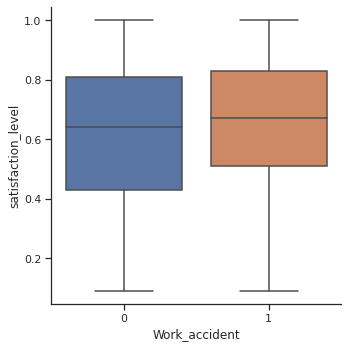

In [12]:
sns.catplot(data=df, y='satisfaction_level', x='Work_accident', kind='box', height=5)
# sns.catplot(data=df, y='satisfaction_level', x='Work_accident', hue='salary', kind='swarm')
plt.show()

Observamos que la amplitud de valores que toma el nivel de satisfaccion de las personas que han tenido algun accidente es mas chico y se encuentra un poco mas arriba que de las personas que no han tenido ningun accidente en le trabajo.
Las medianas de ambos casos es muy similar ya que estas se encuentran entre el 0.60 y 0.65 aproximadamente.

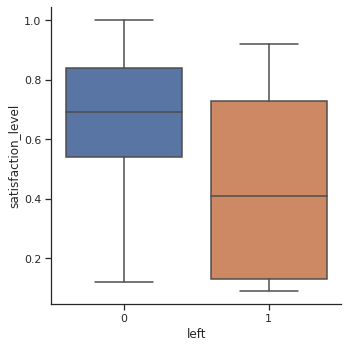

In [13]:
sns.catplot(data=df, y='satisfaction_level', x='left', kind='box', height=5)
# sns.catplot(data=df, y='satisfaction_level', x='Work_accident', hue='salary', kind='swarm')
plt.show()

Podemos observar que, como era de esperarse, el nivel de satisfaccion de las personas que se fueron de la empresa es mucho menor comparado con las que se mantienen, ya que, con las personas que se fueron de la empresa, el nivel de satisfaccion toma una amplia gama de valores comparado con las personas que se mantienene en esta.

Ademas que las medianas de ambos casos es desigual y la de los empleados que no estan en la empresa es significativamente menor.

Un insight destacar es que hay personas con un nivel de satisfaccion alto que se fueron de la empresa.

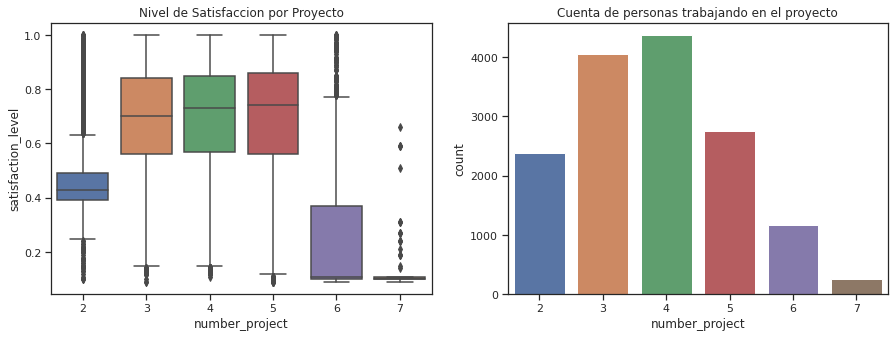

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(ax=ax[0], data=df, y='satisfaction_level', x='number_project')
ax[0].set_title('Nivel de Satisfaccion por Proyecto')

sns.countplot(ax=ax[1], data=df, x='number_project')
ax[1].set_title('Cuenta de personas trabajando en el proyecto')
# sns.catplot(data=df, y='satisfaction_level', x='Work_accident', hue='salary', kind='swarm')
plt.show()

Podemos observar el nivel de satisfaccion que existe dependiendo del proyecto y la cantidad de personas que han trabajado en el proyecto,
Aqui nos podemos dar cuenta que los proyectos que mayor nivel de satisfaccion han tenido son el proyecto 3, 4 y 5, ya que son los que toman los valores mas elevados y tienen la mediana muy similar y alta, el siguiente proyecto que tiene el nivel de satisfaccion mas alto es el 2, ya que toma valores mucho menoes y la mediana es menos, aunque existen muchos mas outliers, siguiente el criterio del rango intercuartilico.

De aqui, los proyectos que tienen los peores niveles de satisfaccion son el 6 y el 7, ya que tienen una mediana menor al 0.1, tambien son los proyectos que cuentan con la menor cantidad de personas involucradas.

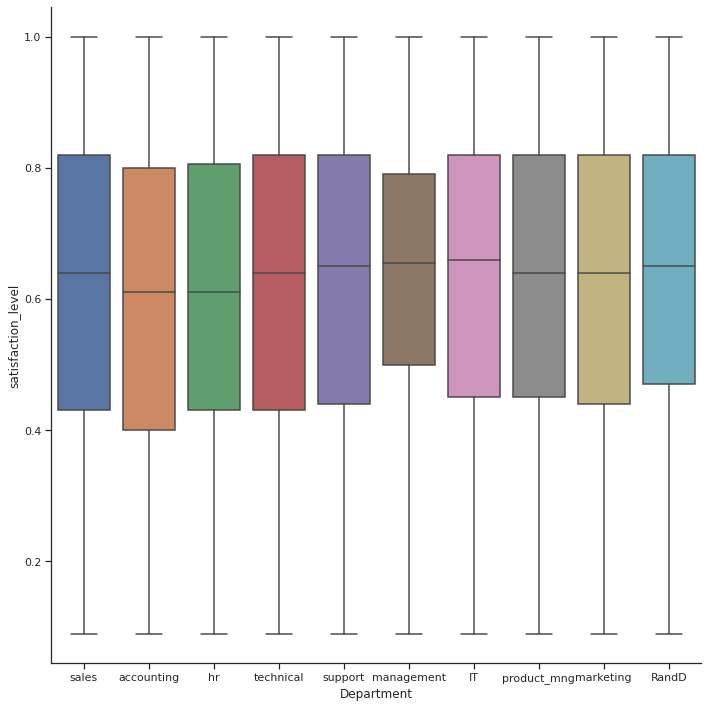

In [15]:
sns.catplot(data=df, y='satisfaction_level', x='Department', kind='box', height=10)
# sns.catplot(data=df, y='satisfaction_level', x='Work_accident', hue='salary', kind='swarm')
plt.show()

Podemos observar que el nivel de satisfaccion dependiendo del departamento que trabajen las personas dentro de la empresa es muy similar entre estas y teniendo una mediana muy parecidas y relativamente altas.

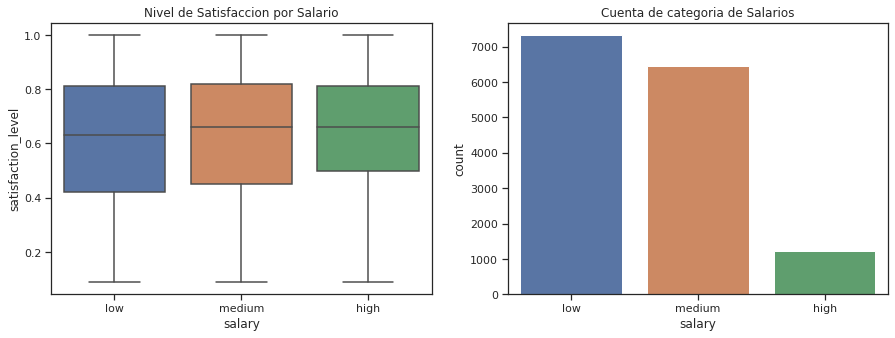

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(ax=ax[0], data=df, y='satisfaction_level', x='salary')
ax[0].set_title('Nivel de Satisfaccion por Salario')

sns.countplot(ax=ax[1], data=df, x='salary')
ax[1].set_title('Cuenta de categoria de Salarios')
# sns.catplot(data=df, y='satisfaction_level', x='Work_accident', hue='salary', kind='swarm')
plt.show()

Observamos que el nivel de satisfaccion por categoria de salario es bastante similar entre estas y, como era de esperarse,  predomina las personas que un nivel de salario bajo, seguido de las del salario medio y por ultimo las personas que tienen un salario categorizado como alto.

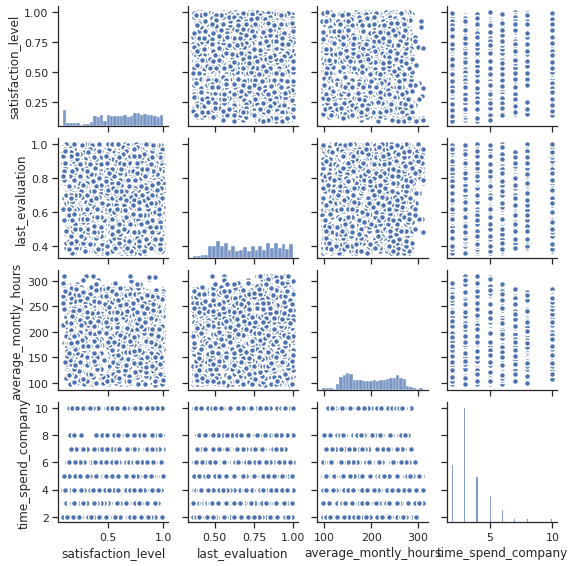

In [92]:
sns.pairplot(df, height=2, plot_kws=dict(marker="o", linewidth=1.5))
plt.show()

Podemos observar que no hay una tendencia en los datos si tratamos de predecir el nivel de satisfaccion de las personas trabajando en la empresa, aun asi procederemos a ajustar un modelo de regresion lineal.

<AxesSubplot:>

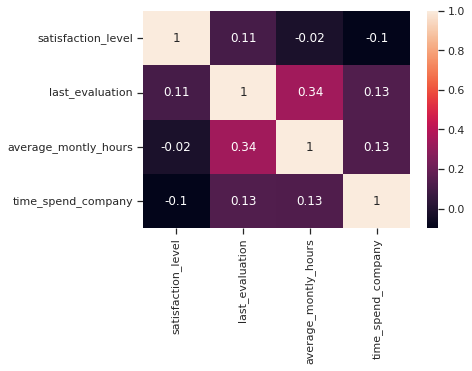

In [54]:
sns.heatmap(df.corr(), annot=True)

Como ya hicimos un analisis exploratorio de datos, entendemos un poco mas los datos por lo que primero que haremos es hacer hacer dummies a las variables categoricas

In [18]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies_columns = list(df_dummies.columns)

df_dummies_columns

['satisfaction_level',
 'last_evaluation',
 'average_montly_hours',
 'time_spend_company',
 'number_project_3',
 'number_project_4',
 'number_project_5',
 'number_project_6',
 'number_project_7',
 'Work_accident_1',
 'left_1',
 'promotion_last_5years_1',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_low',
 'salary_medium']

In [19]:
X = df_dummies.drop(columns='satisfaction_level')
X_columns = X.columns

y = df[['satisfaction_level']].values
X = X.values


Nota: quitamos el primer valor de cada variable dummie para evitar problemas de colinealidad

Ahora haremos un escalamiento a los datos para que el rango de valores que tome cada dato sea el mismo y el algoritmo no le de mucha importancia a las variables que tienen mayor rango de valores solo por tener esto.

In [20]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

### Ahora ajustaremos un modelo de regresion lineal multiple y posteriormente veremos si podremos mejorarlo

In [93]:
model = LinearRegression()

model.fit(X_scaled, y)

print(f'El R^2 del modelo es: {model.score(X_scaled, y).round(2)}')


El R^2 del modelo es: 0.35


In [22]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.ravel()

y = y.ravel()

In [23]:
from regressors import stats

In [24]:
stats.summary(model, X_scaled, y, X_columns)

Residuals:
  Min    1Q  Median   3Q  Max
-0.76 -0.15    0.00 0.12 0.62


Coefficients:
                         Estimate  Std. Error  t value  p value
_intercept                   0.49        0.01    66.50     0.00
last_evaluation              0.10        0.01    15.61     0.00
average_montly_hours         0.04        0.01     5.15     0.00
time_spend_company          -0.06        0.01    -6.50     0.00
number_project_3             0.12        0.01    23.82     0.00
number_project_4             0.13        0.01    26.43     0.00
number_project_5             0.13        0.01    22.76     0.00
number_project_6            -0.25        0.01   -34.70     0.00
number_project_7            -0.39        0.01   -28.18     0.00
Work_accident_1              0.00        0.00     0.12     0.90
left_1                      -0.09        0.00   -19.64     0.00
promotion_last_5years_1      0.02        0.01     1.36     0.17
Department_RandD            -0.01        0.01    -1.64     0.10
Department_accoun

Hacemos un nuevo modelo con las variables que se obtuvieron significativas

In [25]:
drop_columns = ['satisfaction_level',
 'Work_accident_1',
 'promotion_last_5years_1',
 'Department_RandD',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_medium',
 'salary_low' ]


In [26]:
X = df_dummies.drop(columns=drop_columns)
X_columns = X.columns

y = df[['satisfaction_level']].values
X = X.values

In [27]:
X

array([[  0.53, 157.  ,   3.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.86, 262.  ,   6.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.88, 272.  ,   4.  , ...,   1.  ,   1.  ,   0.  ],
       ...,
       [  0.53, 143.  ,   3.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.96, 280.  ,   4.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.52, 158.  ,   3.  , ...,   0.  ,   1.  ,   0.  ]])

Nota: quitamos el primer valor de cada variable dummie para evitar problemas de colinealidad

Ahora haremos un escalamiento a los datos para que el rango de valores que tome cada dato sea el mismo y el algoritmo no le de mucha importancia a las variables que tienen mayor rango de valores solo por tener esto.

In [58]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

### Ahora ajustaremos un modelo de regresion lineal multiple y posteriormente veremos si podremos mejorarlo

In [59]:
model = LinearRegression()

model.fit(X_scaled, y)

model.score(X_scaled, y)


0.3543701020470654

In [30]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.ravel()

y = y.ravel()

In [31]:
from regressors import stats

In [32]:
stats.summary(model, X_scaled, y, X_columns)

Residuals:
  Min    1Q  Median   3Q  Max
-0.76 -0.15    0.01 0.12 0.62


Coefficients:
                       Estimate  Std. Error  t value  p value
_intercept                 0.50        0.00   112.52     0.00
last_evaluation            0.10        0.01    15.78     0.00
average_montly_hours       0.04        0.01     5.19     0.00
time_spend_company        -0.06        0.01    -6.49     0.00
number_project_3           0.12        0.01    23.87     0.00
number_project_4           0.13        0.01    26.54     0.00
number_project_5           0.13        0.01    22.76     0.00
number_project_6          -0.25        0.01   -34.75     0.00
number_project_7          -0.39        0.01   -28.22     0.00
left_1                    -0.09        0.00   -20.05     0.00
Department_accounting     -0.02        0.01    -3.34     0.00
---
R-squared:  0.35393,    Adjusted R-squared:  0.35350
F-statistic: 821.06 on 10 features


### Como vemos que no se mejoro el resultado lo intentaremos hacer utilizando otro metodo que es el Random Forest utilizando Decision Tree Regresor

In [33]:
df_dummies = pd.get_dummies(df, drop_first=False)
df_dummies_columns = list(df_dummies.columns)

df_dummies_columns

['satisfaction_level',
 'last_evaluation',
 'average_montly_hours',
 'time_spend_company',
 'number_project_2',
 'number_project_3',
 'number_project_4',
 'number_project_5',
 'number_project_6',
 'number_project_7',
 'Work_accident_0',
 'Work_accident_1',
 'left_0',
 'left_1',
 'promotion_last_5years_0',
 'promotion_last_5years_1',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [34]:
X = df_dummies.drop(columns='satisfaction_level')
X_columns = X.columns

y = df[['satisfaction_level']].values
X = X.values


Nota: quitamos el primer valor de cada variable dummie para evitar problemas de colinealidad

Ahora haremos un escalamiento a los datos para que el rango de valores que tome cada dato sea el mismo y el algoritmo no le de mucha importancia a las variables que tienen mayor rango de valores solo por tener esto.

In [35]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

### Separaremos los datos en train y test 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1452)

### Ahora ajustaremos un modelo de regresion por medio de Random Tree Regressor

In [37]:
X_train.shape

(11249, 28)

In [49]:
model = RandomForestRegressor(max_depth=100, n_estimators=1000)

model.fit(X_train, y_train.ravel())

print(f'El R^2 del conjunto de entrenamiento es: {model.score(X_train, y_train.ravel()).round(2)}')


El R^2 del conjunto de entrenamiento es: 0.94


#### Probamos el modelo con el conjunto Test 

In [50]:
print(f'El R^2 del conjunto de prueba es: {model.score(X_test, y_test.ravel()).round(2)}')

El R^2 del conjunto de prueba es: 0.54


Podemos observar que el modelo mejora la prediccion de los datos con respecto a un modelo de regresion multiple pero aun asi no es un buen modelo para predecir el nivel de satisfaccion de los empleados de la empresa.

Ademas nos podemos dar cuenta que el modelo se encuentra sobreparametrizado ya que el R^2 en el conjunto de entrenamiento es alto, pero en el conjunto de prueba tenemos un R^2 mucho mas baja, casi de 40% menos que no se puede mejorar con alguna modificacion hecha.

### Por ultimo, intentaremos hacer una red neuronal vanilla para poder predecir el nivel de satisfaccion de los empleados 

In [40]:
from sklearn.neural_network import MLPRegressor

In [41]:
model_nn = MLPRegressor(hidden_layer_sizes=(100,50,30,10), activation='relu', early_stopping=True, learning_rate='adaptive', solver='adam', alpha=0.011, max_iter=10000)

In [47]:
model_nn.fit(X_train, y_train.ravel())

print(f'El R^2 del conjunto de entrenamiento es: {model_nn.score(X_train, y_train.ravel()).round(2)}')

El R^2 del conjunto de entrenamiento es: 0.51


In [45]:
print(f'El R^2 del conjunto de prueba es: {model_nn.score(X_test, y_test.ravel()).round(2)}')

El R^2 del conjunto de prueba es: 0.45


Despues de probar muchos parametros diferentes en la red neuronal nos damos cuenta que no hay alguna mejoria en la R^2 que obtenemos en cualquier de los 2 conjuntos de datos.

## Conclusiones

Después de realizar todo el proceso y de análisis, nos pudimos dar cuenta que los modelos planteados con anterioridad fallaron en poder predecir los datos que se cuentan.
Esto puede ser debido a varios factores, uno de ellos puede ser que los datos que tenemos no sean los adecuados para realizar este análisis ya que puede haber otros factores externos que influyan en el nivel de satisfacción.
Dado que las variables donde se diferencias mas notables en el nivel de satisfacción son en el proyecto asignado y si la persona encuentra en la empresa o no, seria recomendable hacer un análisis mas profundo sobre estos empleados para obtener mejores datos y poder realizar un modelo mejor y entender con mas a detalle porque tienen ese nivel de satisfacción los empleados.

## Recomendaciones

Dado que no se obtuvieron resultados satisfactorios una recomendación es acercarse a recursos humanos, y hacer un análisis en otros datos que se tengan, como factores personales, numero de hijos, distancia al trabajo, es decir, entrevistar a las personas de satisfacción baja para hacerles preguntas, para descubrir la causa de esta, ya que, como nos dimos cuenta, los datos que tenemos a disposición no son los adecuados para poder realizar un análisis que sea relevante para la empresa.

## Aprendizajes

Dado que los resultados que obtuvimos no fueron satisfactorios en este análisis, nos dimos cuenta que no siempre vamos a tener los datos que necesitamos para poder realizar lo que se nos encarga, aunque los datos estén limpios.
Gracias a todo lo que vimos con anterioridad, nos dimos cuenta que por mas que queramos realizar un buen análisis con los datos que se nos otorguen, a veces no tenemos la posibilidad.
Lo que nos queda al final es poder hacer recomendaciones a la empresa para que se haga una mejor recolección de datos y, con esto, hacer un mejor análisis y poder obtener mejores resultados para generar valor a la empresa. 
